In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
import numpy as np

import matplotlib

from mpltools import annotation

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
from scipy.optimize import fsolve

In [3]:
def plot_results_dict(results_dict, facecolor, label, linestyle, linecolor, tickers=None, log_scale=False):
    
    objective_means = np.mean(results_dict, axis=0)
    objective_se = np.std(results_dict, axis=0)  #/np.sqrt(len(results_dict)) 
    
    plt.plot(tickers, objective_means, linestyle=linestyle, label=label, linewidth=3, color=linecolor)
    plt.fill_between(tickers, objective_means-objective_se, objective_means+objective_se,
                    alpha=1, edgecolor='#1B2ACC', facecolor=facecolor,
        linewidth=0)
    
    if log_scale==True:
        plt.xscale('log')

        
def plot_objectives(objective_means, objective_stds, facecolor, label, linestyle, linecolor, tickers=None, log_scale=False):
    
    objective_means = np.array(objective_means)
    objective_stds = np.array(objective_stds)
    
    plt.plot(tickers, objective_means, linestyle, label=label, linewidth=3, color=linecolor)
    plt.fill_between(tickers, objective_means-objective_stds, objective_means+objective_stds,
                    alpha=1, edgecolor='#1B2ACC', facecolor=facecolor,
        linewidth=0)
    if log_scale==True:
        plt.yscale('log')



In [4]:
def plot_line(objective_means, label, linestyle, linecolor, tickers=None, log_scale=False):
    
    plt.plot(tickers, objective_means, linestyle, label=label, linewidth=3, color=linecolor)

    if log_scale==True:
        plt.yscale('log')
        



# Individual optima


In [387]:
def compute_m_i_star(a_opt=0.95, k=3, c_i=0.1):
    m_zero_initial_guess = k+1
    m_initial_guess = k+1
    acc_func = lambda m: a_opt - (np.sqrt(2*k * (2 + np.log(m/k)))+4)/(np.sqrt(m))
    
    acc_d = lambda m : - (k)/(np.sqrt(2) * np.power(m, 1.5) * np.sqrt(k * (2 + np.log(m/k)))) + (4 + np.sqrt(2) * np.sqrt(k*(2 + np.log(m/k))))/(2*np.power(m, 1.5))
    
    derivative_func = lambda m : -c_i - (k)/(np.sqrt(2) * np.power(m, 1.5) * np.sqrt(k * (2 + np.log(m/k)))) + (4 + np.sqrt(2) * np.sqrt(k*(2 + np.log(m/k))))/(2*np.power(m, 1.5))

    m_zero = fsolve(acc_func, m_zero_initial_guess)
#     print ("m_0 = %f" % m_zero)
    
# #     # derivative at m_zero:
#     m_zero_derivative = acc_d(m_zero)[0]
# #     print ('derivative at m_0:', m_zero_derivative)
    
#     if m_zero_derivative <= c_i:
#         m_opt = 0
#         print('agent is high cost')
#         return m_opt
    
    m_i_star = fsolve(derivative_func, m_initial_guess)[0]

#     print ("m_i star is m = %f" % m_i_star)
#     print ("at m_i star the value of the expression is %f" % derivative_func(m_solution))
    
    m_i_star_cost = float(c_i * m_i_star)
    m_i_star_acc = float(acc_func(m_i_star))
    
#     print ("at m_i star the data cost is %f" % m_i_star_cost)
#     print ("at m_i star the accuracy is %f" % m_i_star_acc)
    
    if m_i_star_cost < m_i_star_acc:
        m_opt = m_i_star
#         print('agent is low cost')
    else: 
        m_opt = 0
#         print('agent is mid cost')
    
    return m_opt


In [238]:
c_values = np.logspace(-5, -2, num = 20)

In [239]:


def gen_m_star_values(c_values=None, k=3):
    
    m_i_star_values= []

    for c_value in c_values:
        m_i_star = compute_m_i_star(a_opt=0.95, k=k, c_i=c_value)
#         print('m_i_star', m_i_star)
        m_i_star_values.append(m_i_star)
    
#     print('k= ', k)
#     print(m_i_star_values)
        
    return m_i_star_values



In [240]:

m_i_star_values_k1 = gen_m_star_values(c_values=c_values, k=1)
m_i_star_values_k3 = gen_m_star_values(c_values=c_values, k=10)
m_i_star_values_k5= gen_m_star_values(c_values=c_values, k=100)
# m_i_star_values_k10 = gen_m_star_values(c_values=c_values, k=10)



m_i star is m = 5506.930845
agent is low cost
m_i star is m = 4300.754177
agent is low cost
m_i star is m = 3358.406782
agent is low cost
m_i star is m = 2622.245560
agent is low cost
m_i star is m = 2047.209644
agent is low cost
m_i star is m = 1598.076236
agent is low cost
m_i star is m = 1247.314500
agent is low cost
m_i star is m = 973.407274
agent is low cost
m_i star is m = 759.538679
agent is low cost
m_i star is m = 592.567907
agent is low cost
m_i star is m = 462.226835
agent is low cost
m_i star is m = 360.492675
agent is low cost
m_i star is m = 281.097505
agent is low cost
m_i star is m = 219.144845
agent is low cost
m_i star is m = 170.809925
agent is low cost
m_i star is m = 133.105394
agent is mid cost
m_i star is m = 103.698205
agent is mid cost
m_i star is m = 80.766489
agent is mid cost
m_i star is m = 62.887708
agent is mid cost
agent is high cost
m_i star is m = 8514.864833
agent is low cost
m_i star is m = 6621.389018
agent is low cost
m_i star is m = 5147.389923
a

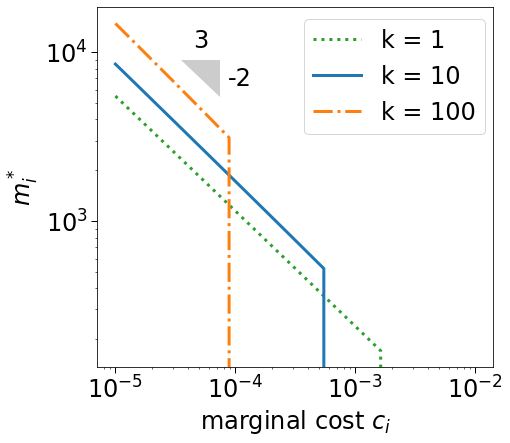

In [306]:


color_1 = 'C0'
color_2 = 'C1'
color_3 = 'C2'
color_4 = 'grey'

fc_1 = '#add8e6' #facecoor
fc_2 = '#FED8B1'
fc_3 = '#D0F0C0'
fc_4 = 'silver'

linestyle_1 = '-'
linestyle_2 = '-.'
linestyle_3 = '--'
linestyle_4 = ':'


# cate_color = '#9B30FF'
# cate_facecolor = "#FFE1FF"
# cate_linestyle = '--'





'''
between mid/low
k=1 0.007
k=3 0.004
k=5 0.0029
k=10 0.00185

'''


local_tickers=c_values

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

plot_line(m_i_star_values_k1, label='k = 1', linestyle=linestyle_4, linecolor=color_3, tickers=local_tickers, log_scale=True)
plot_line(m_i_star_values_k3, label='k = 10', linestyle=linestyle_1, linecolor=color_1, tickers=local_tickers, log_scale=True)
plot_line(m_i_star_values_k5, label='k = 100', linestyle=linestyle_2, linecolor=color_2, tickers=local_tickers, log_scale=True)
# plot_line(m_i_star_values_k10, label='k = 10', linestyle=linestyle_3, linecolor=color_3, tickers=local_tickers, log_scale=True)

# plt.plot(np.log(0.004),np.log(1),marker="o", markersize=20, markeredgecolor="red", markerfacecolor="red")

# plt.vlines(x = 0.007, ymin=0, ymax=200,color = color_3, linewidth=8.0)
# plt.vlines(x = 0.004, ymin=0, ymax=200,color = color_1, linewidth=8.0)

# plt.vlines(x = 0.0029, ymin=0, ymax=200,color = color_2, linewidth=8.0)

# plt.vlines(x = 0.00185, ymin=0, ymax=150,color = color_3,linestyle=linestyle_3, linewidth=2.0)


# plt.plot(tickers, all_neg_error*np.ones_like(noises), '-', color='black', label='All neg.')

# plt.ylim=( (10**-1,10**4) )

# plt.ylim(RMSE_ylim)


plt.tick_params(length=6, width=1, top=False,right=False,labelsize=24)

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1), fontsize=24, ncol=1)

plt.xlabel("marginal cost "+r"$c_i$", fontsize=24)
plt.ylabel(r"$m_i^*$", fontsize=24)

plt.subplots_adjust(top = 1, bottom = 0, right = 1.1, left = 0, 
            hspace = 0, wspace = 0)
annotation.slope_marker((0.000035, 9000), (-2, 3), text_kwargs={'fontsize': 24})

plt.savefig('inddata_c.pdf', format='pdf', bbox_inches = 'tight')

# Optimal collection mechanism

In [411]:
def compute_best_response(a_opt=0.95, k=1, c_i=0.1, extra_data=0, n=1):
    
    m_istar = 0
#     m_istar = compute_m_i_star(a_opt, k, c_i)    
#     if extra_data <= 0:
#         return m_istar
    
    error_func = lambda m: 1 if m < k+1 else (np.sqrt(2*k * (2 + np.log(m/k)))+4)/(np.sqrt(m))
    acc_func = lambda m: a_opt - error_func(m)
    best_response_func = lambda m: acc_func(n*m + extra_data) - (acc_func(m_istar) + c_i * m)
    initial_max_guess =  a_opt / c_i
    m_imax = fsolve(best_response_func, initial_max_guess)[0]
    if m_imax < 0.3:  # large tolerance of error to stabilize equil computation
        m_imax = 0
    total_data = int(n * m_imax)
    return max(0, total_data)

In [412]:
n_list = np.logspace(1, 4.5, num = 100)
d1_list = [compute_best_response(k=1, n=n) for n in n_list]
d10_list = [compute_best_response(k=10, n=n) for n in n_list]
d100_list = [compute_best_response(k=100, n=n) for n in n_list]

/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


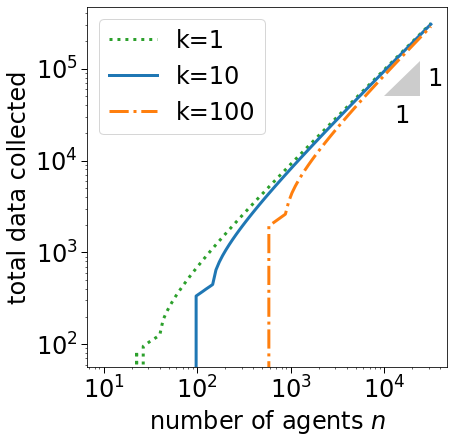

In [413]:

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(n_list, d1_list, linestyle_4, label='k=1', linewidth=3, color=color_3)
plt.plot(n_list, d10_list, linestyle_1, label='k=10', linewidth=3, color=color_1)
plt.plot(n_list, d100_list, linestyle_2, label='k=100', linewidth=3, color=color_2)
# annotation.slope_marker((1400, 7000), (1.3, 1))
annotation.slope_marker((10000, 50000), (1, 1), text_kwargs={'fontsize': 24})

plt.tick_params(length=6, width=1, top=False,right=False,labelsize=24)

plt.legend(fontsize=24, ncol=1)

plt.xlabel("number of agents "+r"$n$", fontsize=24)
plt.ylabel(r"total data collected", fontsize=24)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.savefig('maxdata_n.pdf', format='pdf', bbox_inches = 'tight')

In [414]:
c_list = np.logspace(-2, 1, num = 100)
d1_list = [compute_best_response(k=1, n=10000, c_i = c) for c in c_list]
d10_list = [compute_best_response(k=10, n=10000, c_i = c) for c in c_list]
d100_list = [compute_best_response(k=100, n=10000, c_i = c) for c in c_list]

/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


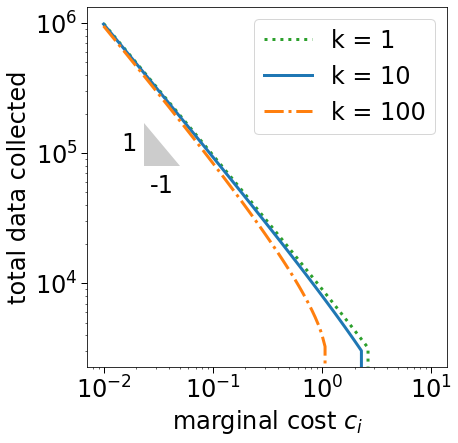

In [415]:

plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(c_list, d1_list, linestyle_4, label='k = 1', linewidth=3, color=color_3)
plt.plot(c_list, d10_list, linestyle_1, label='k = 10', linewidth=3, color=color_1)
plt.plot(c_list, d100_list, linestyle_2, label='k = 100', linewidth=3, color=color_2)
# annotation.slope_marker((1400, 7000), (1.3, 1))
annotation.slope_marker((0.05, 80000), (1, -1), invert=True, text_kwargs={'fontsize': 24})

plt.tick_params(length=6, width=1, top=False,right=False,labelsize=24)

plt.legend(fontsize=24, ncol=1)

plt.xlabel("marginal cost "+r"$c_i$", fontsize=24)
plt.ylabel(r"total data collected", fontsize=24)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.savefig('maxdata_c.pdf', format='pdf', bbox_inches = 'tight')

In [462]:
def min_viable_n(k=3, c_i=0, n_list = None):
    for n in n_list:
        td = compute_best_response(k=k, n=int(n), c_i = c_i)
        if td > 0:
            return int(n)
    return float('inf')

In [463]:
n_list = np.logspace(0, 6, num = 100)
c_list = np.logspace(-3, 0, num = 100)
    
d1_list = [min_viable_n(k=1, c_i=c, n_list=n_list) for c in c_list]
d10_list = [min_viable_n(k=10, c_i=c, n_list=n_list) for c in c_list]
d100_list = [min_viable_n(k=100, c_i=c, n_list=n_list) for c in c_list]

/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


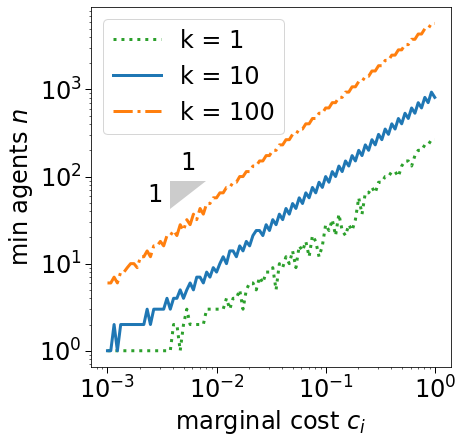

In [464]:
plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(c_list, d1_list, linestyle_4, label='k = 1', linewidth=3, color=color_3)
plt.plot(c_list, d10_list, linestyle_1, label='k = 10', linewidth=3, color=color_1)
plt.plot(c_list, d100_list, linestyle_2, label='k = 100', linewidth=3, color=color_2)
# annotation.slope_marker((1400, 7000), (1.3, 1))
annotation.slope_marker((0.008, 90), (1, 1), invert=True, text_kwargs={'fontsize': 24})

plt.tick_params(length=6, width=1, top=False,right=False,labelsize=24)

plt.legend(fontsize=24, ncol=1)

plt.xlabel("marginal cost "+r"$c_i$", fontsize=24)
plt.ylabel(r"min agents $n$", fontsize=24)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.savefig('minn_c.pdf', format='pdf', bbox_inches = 'tight')

# Optimal unknown mechanism

In [489]:
def compute_mixture_eq(a_opt=0.95, k=3, low_ratio=0.1, low_cost=0.001, high_cost=1, n=1000):
    high_cost_cont = 0
    low_cost_cont = 0
    n_low = low_ratio * n
    n_high = n - n_low
    err = 1
    while(err > 1e-6):  # error tolerance for equilibrium computation
        print(low_cost_cont, high_cost_cont)
        new_low_cost_cont = compute_best_response(a_opt=a_opt, k=k, c_i=low_cost, extra_data=high_cost_cont, n=n_low)
        new_high_cost_cont = compute_best_response(a_opt=a_opt, k=k, c_i=high_cost, extra_data=low_cost_cont, n=n_high)
        err = abs(new_low_cost_cont - low_cost_cont) + abs(new_high_cost_cont - high_cost_cont)
        low_cost_cont, high_cost_cont = new_low_cost_cont, new_high_cost_cont
        
    return low_cost_cont + high_cost_cont
    

In [491]:
p_list = np.logspace(-3, 0, num = 10)
d1_list = [compute_mixture_eq(k=1, low_ratio=p) for p in p_list]
d10_list = [compute_mixture_eq(k=10, low_ratio=p) for p in p_list]
d100_list = [compute_mixture_eq(k=100, low_ratio=p) for p in p_list]

0 0
690 689
783 782
789 789
790 789
0 0
1720 688
1789 831
1799 833
0 0
4016 686
4064 873
4075 873
0 0
9085 681
9118 903
9127 903
0 0
20198 671
20219 918
20227 918
0 0
44425 649
44439 913
44444 913
0 0
97049 603
97057 873
97061 873
0 0
211063 502
211068 768
211070 768
0 0
457652 284
457654 528
457655 528
0 0
990330 0
0 0
341 341
459 458
500 500
512 512
516 515
516 516
517 516
0 0
1170 340
1309 620
1379 634
1382 640
1383 640
0 0
3311 340
3379 734
3444 736
3444 738
0 0
8088 339
8128 808
8178 809
0 0
18741 335
18765 853
18802 853
0 0
42264 331
42280 869
42305 869
0 0
93819 0
93819 844
93845 844
0 0
206216 287
206222 751
206232 751
0 0
450362 0
450362 519
450370 519
0 0
979359 0
0 0
0 0
0 0
0 0
4089 0
4089 428
4570 428
4570 453
4591 453
4591 454
4592 454
0 0
14041 0
14041 644
14226 644
14226 646
0 0
35679 0
35679 734
35790 734
35790 735
0 0
84218 0
84218 758
84287 758
0 0
191975 0
191975 699
192016 699
0 0
429062 0
429062 495
429081 495
0 0
947359 0


/home/praneeth/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


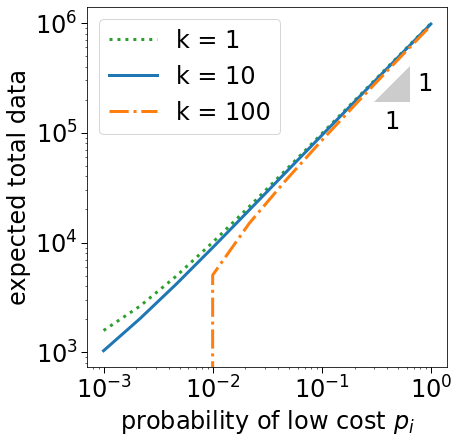

In [502]:
plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(p_list, d1_list, linestyle_4, label='k = 1', linewidth=3, color=color_3)
plt.plot(p_list, d10_list, linestyle_1, label='k = 10', linewidth=3, color=color_1)
plt.plot(p_list, d100_list, linestyle_2, label='k = 100', linewidth=3, color=color_2)
# annotation.slope_marker((1400, 7000), (1.3, 1))
annotation.slope_marker((0.3, 190000), (1, 1), invert=False, text_kwargs={'fontsize': 24})

plt.tick_params(length=6, width=1, top=False,right=False,labelsize=24)

plt.legend(fontsize=24, ncol=1)

plt.xlabel("probability of low cost "+r"$p_i$", fontsize=24)
plt.ylabel(r"expected total data", fontsize=24)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

# plt.savefig('minn_c.pdf', format='pdf', bbox_inches = 'tight')